In [1]:
import os 
import glob
import random
import numpy as np 
import pandas as pd 
import SimpleITK as sitk
import matplotlib.pyplot as plt 
from keras.models import load_model
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
#
import model.metrics as mm
import model.callBack as mc 
from model.network import unet3d
from utils.utils import *
from utils.eval import batch_segmentation

Using TensorFlow backend.


In [2]:
import configTrain

In [3]:
model_path = '/public/lixin/lung/lung-lobe-seg/3D-unet-keras-lunglobe/model_save/2019-10-16-2/one/model.h5'
model = load_model(model_path, compile=False)

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 224, 224, 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 48, 224, 224, 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 48, 224, 224, 64          conv3d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 48, 224, 224, 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv3d_2 (

In [6]:
folder = '/public/lixin/lung/lung-lobe-seg/data/'
img_list = glob.glob(os.path.join(folder, '*_img.nii.gz'))
print(len(img_list))
train_list = img_list[:37]
val_list = img_list[37:]
print(len(val_list))

47
10


In [7]:
example_path = '/public/lixin/lung/lung-lobe-seg/data/1.3.6.1.4.1.14519.5.2.1.6279.6001.237215747217294006286437405216_img.nii.gz'
mask_path = '/public/lixin/lung/lung-lobe-seg/data/1.3.6.1.4.1.14519.5.2.1.6279.6001.237215747217294006286437405216_mask.nii.gz'
img, mask, weight, original_shape, bbox = crop_brain_region([example_path], mask_path) 

In [8]:
img[0].shape

(125, 256, 256)

Text(0.5, 1.0, 'mask')

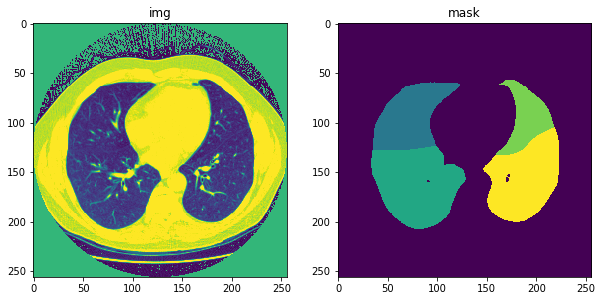

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(img[0][50])
ax1.set_title('img')
ax2.imshow(mask[50])
ax2.set_title('mask')

In [32]:
out = segment_one_image(example_path, model)

Text(0.5, 1.0, 'predict')

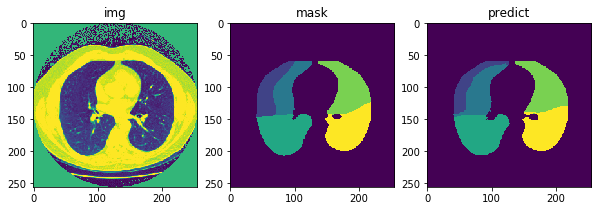

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))
ax1.imshow(img[0][60])
ax1.set_title('img')
ax2.imshow(mask[60])
ax2.set_title('mask')
ax3.imshow(out[60])
ax3.set_title('predict')

In [39]:
import tqdm
def pred_brats(df, detect_func):
    """
    prediction
    """
    gts = []
    results = []
    with tqdm.tqdm(total=len(df)) as pbar:
        for path in df:
            final_label = segment_one_image(path, model)
            pbar.update()
    return None
 


In [40]:
pred_brats(val_list, model)

100%|██████████| 10/10 [00:38<00:00,  3.86s/it]
